# 🏥 Predição de Câncer de Mama com Regressão Logística

## 📌 Sobre o Dataset Breast Cancer
O **dataset Breast Cancer** é um conjunto de dados disponibilizado pelo **sklearn** e contém informações sobre tumores mamários diagnosticados como **malignos ou benignos**. O objetivo do modelo é prever se um tumor é **maligno (1)** ou **benigno (0)** com base em características extraídas de exames médicos.

As principais características incluem:
- 📏 **Tamanho médio das células tumorais**
- 🔬 **Textura média**
- 📐 **Perímetro médio**
- 🌿 **Área média da célula**
- 📊 **Concavidade média**
E diversas outras **30 variáveis** relacionadas à morfologia do tumor.

---

## 🚀 O que o código faz?
Este código implementa um modelo de **Regressão Logística** para classificar tumores como **malignos ou benignos**.

🔹 **Carrega o dataset Breast Cancer**  
🔹 **Divide os dados em treino e teste** (80/20)  
🔹 **Utiliza validação cruzada para encontrar o melhor hiperparâmetro `C`**  
🔹 **Treina um modelo de Regressão Logística**  
🔹 **Avalia o modelo com métricas como:**  
   - Acurácia  
   - Relatório de classificação  
   - Matriz de confusão  
   - **Curva ROC e AUC**  

---

## 🛠️ Como funciona o código?
O código está modularizado para melhor organização:

1️⃣ **`carregar_dataset()`** → Carrega os dados e exibe suas primeiras linhas  
2️⃣ **`dividir_dados()`** → Divide os dados em treino e teste  
3️⃣ **`encontrar_melhor_c()`** → Usa validação cruzada para encontrar o melhor hiperparâmetro `C`  
4️⃣ **`treinar_logistic_regression()`** → Treina o modelo de Regressão Logística com `C` otimizado  
5️⃣ **`avaliar_modelo()`** → Avalia o modelo usando métricas como **acurácia, matriz de confusão e Curva ROC**  

---

## 📊 Avaliação do Modelo
Após o treinamento, o código exibe:

✔ **Acurácia** do modelo  
✔ **Relatório de Classificação** (Precisão, Recall, F1-Score)  
✔ **Matriz de Confusão** para análise de erros e acertos  
✔ **Curva ROC** para avaliação do desempenho do modelo  

📌 **Matriz de Confusão:**  
A matriz de confusão mostra a distribuição das previsões do modelo. Quanto mais valores corretos nas diagonais principais, melhor a classificação.

📌 **Curva ROC & AUC:**  
A **Curva ROC** ilustra a relação entre a **Taxa de Verdadeiros Positivos (TPR)** e a **Taxa de Falsos Positivos (FPR)**.  
O **AUC (Área Sob a Curva)** indica a qualidade do modelo, sendo **1.0** um modelo perfeito e **0.5** equivalente a um chute aleatório.

---

## 🔧 Requisitos
Antes de rodar o código, certifique-se de instalar as bibliotecas necessárias:

```bash
pip install numpy pandas seaborn matplotlib scikit-learn


📌 Primeiras 5 linhas do dataset Breast Cancer:

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst textur

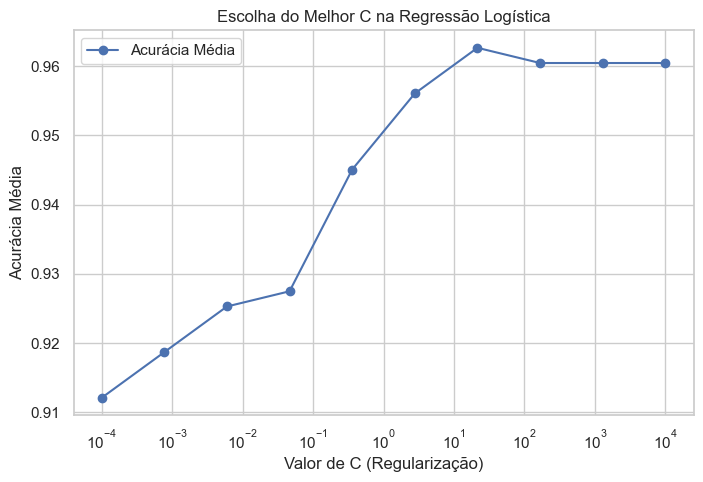

🔍 Melhor valor de C encontrado: 21.5443

✅ Acurácia do modelo: 0.96

📊 Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



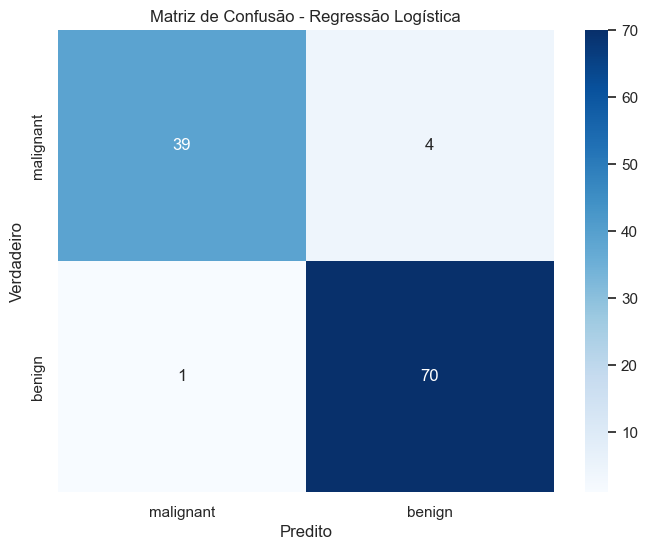

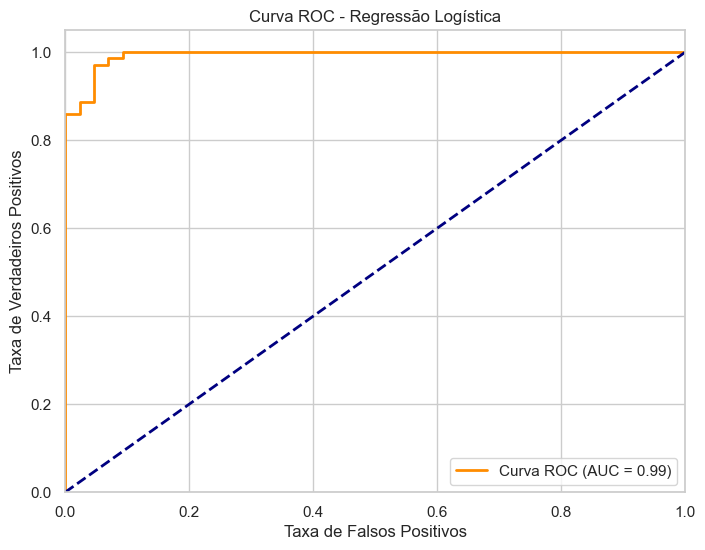

In [6]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# 🔹 Função para carregar e visualizar o dataset Breast Cancer
def carregar_dataset():
    cancer = load_breast_cancer()
    df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    df_cancer['target'] = cancer.target
    print("📌 Primeiras 5 linhas do dataset Breast Cancer:\n")
    print(df_cancer.head(), "\n")
    return cancer, df_cancer

# 🔹 Função para dividir os dados em treino e teste
def dividir_dados(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# 🔹 Função para encontrar o melhor hiperparâmetro C com validação cruzada
def encontrar_melhor_c(X_train, y_train):
    c_values = np.logspace(-4, 4, 10)
    scores = []

    for c in c_values:
        model = LogisticRegression(C=c, solver='liblinear')
        score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
        scores.append(score)

    melhor_c = c_values[np.argmax(scores)]

    # Gráfico da variação da acurácia para diferentes valores de C
    plt.figure(figsize=(8, 5))
    plt.plot(c_values, scores, marker='o', linestyle='-', color='b', label="Acurácia Média")
    plt.xscale("log")
    plt.xlabel("Valor de C (Regularização)")
    plt.ylabel("Acurácia Média")
    plt.title("Escolha do Melhor C na Regressão Logística")
    plt.legend()
    plt.show()

    print(f"🔍 Melhor valor de C encontrado: {melhor_c:.4f}\n")
    return melhor_c

# 🔹 Função para treinar o modelo de Regressão Logística
def treinar_logistic_regression(X_train, y_train, c):
    modelo = LogisticRegression(C=c, solver='liblinear')
    modelo.fit(X_train, y_train)
    return modelo

# 🔹 Função para avaliar o modelo (Adicionada Curva ROC e AUC)
def avaliar_modelo(modelo, X_test, y_test, target_names):
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Acurácia do modelo: {accuracy:.2f}\n")

    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Regressão Logística")
    plt.show()

    # Curva ROC e AUC
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - Regressão Logística')
    plt.legend(loc="lower right")
    plt.show()

# 🚀 Fluxo principal do código
if __name__ == "__main__":
    # Carregando o dataset
    cancer, df_cancer = carregar_dataset()
    X, y = cancer.data, cancer.target
    
    # Dividindo os dados
    X_train, X_test, y_train, y_test = dividir_dados(X, y)
    
    # Encontrando o melhor valor de C com validação cruzada
    melhor_c = encontrar_melhor_c(X_train, y_train)
    
    # Treinando o modelo com o melhor C
    modelo_lr = treinar_logistic_regression(X_train, y_train, melhor_c)
    
    # Avaliando o modelo com Curva ROC e AUC
    avaliar_modelo(modelo_lr, X_test, y_test, cancer.target_names)
